In [12]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

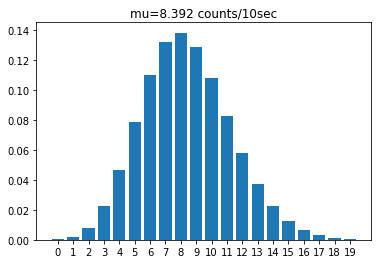

In [13]:
mu = .8392 * 10
x = np.arange(0, 20)
pois44 = stats.poisson.pmf(x, mu=mu) 

plt.bar(x, pois44);
plt.title("mu=8.392 counts/10sec");
plt.xticks(x);

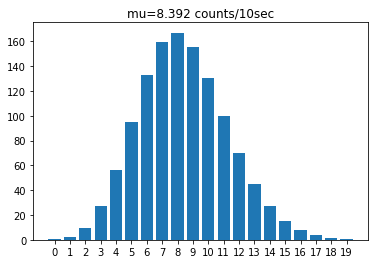

In [14]:
total_ints = 1207 
expected_counts = total_ints * pois44
plt.bar(x, expected_counts);
plt.title("mu=8.392 counts/10sec");
plt.xticks(x);

In [15]:
expected_counts

array([  0.27359489,   2.2960083 ,   9.63405081,  26.94965148,
        56.5403688 ,  94.897355  , 132.72976719, 159.12402947,
       166.92110691, 155.6446588 , 130.61699767,  99.64889495,
        69.68779387,  44.98615124,  26.96598437,  15.08656939,
         7.91290565,   3.9061826 ,   1.82114913,   0.80437282])

In [16]:
expected_counts[:3].sum()

12.203653999633618

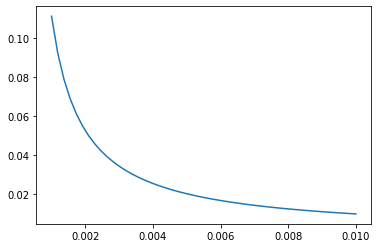

In [17]:
a = 0.0001
b = 0.0001
x = np.linspace(0.001, .01)
gamma = stats.gamma(a, b).pdf(x)
plt.plot(x, gamma);

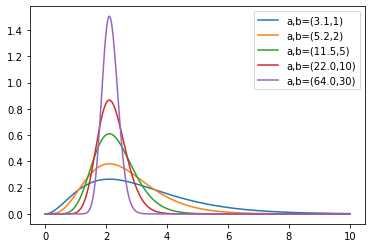

In [18]:
# mode = (a-1)/b
x = np.linspace(0, 10, 500)
for b in [1, 2, 5, 10, 30]:
    a = 1 + 2.1 * b 
    pdf = stats.gamma.pdf(x, a, scale=1/b)
    plt.plot(x, pdf, label=f"a,b=({a},{b})")
plt.legend();

# Gamma-Poisson Model
For an observation $k$ from a Poisson distribution $Po(k|\lambda)$, the likelihood is 
$$
    Pr[Y = k|\lambda] = \frac{\lambda^k e^{-\lambda}}{k!} \equiv L(\lambda)
$$

Given $n$ observations $\{ k_1, ..., k_n \}$,
$$
    L(\lambda; k_1 ... k_n) = \prod_{j=1}^{n} \frac{\lambda^{k_j} e^{-\lambda}}{k_j!} 
     = \frac{\lambda^{\sum_j k_j} e^{-\lambda n}}{k_1! \cdots k_n!}
$$

Prior distribution is chosen to be a $G(\lambda|\alpha, \beta)$
$$
    G(\lambda|\alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}
$$

Posterior:

1. Joint distribution form
   $$
        p(D|\lambda) p(\lambda) =  p(D, \lambda) = 
            \frac{\lambda^{\sum_j k_j} e^{-\lambda n}}{k_1! \cdots k_n!}
            \cdot
            \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}
   $$
2. Marginal Likelihood or Evidence
   \begin{align}
        P(D) & = \int_{\lambda=0}^{\infty} P(D,\lambda) d\lambda \\
            & =  \frac{\beta^\alpha}{\Gamma(\alpha) k_1! \cdots k_n!} 
                \cdot
                \int_{\lambda=0}^{\infty} \lambda^{\alpha + \sum_j k_j - 1}  e^{-\lambda (\beta + n)} d\lambda 
                \\
            & = \frac{\beta^\alpha}{\Gamma(\alpha) k_1! \cdots k_n!} \frac{\Gamma(\hat\alpha)}{\hat\beta^{\hat\alpha}} 
   \end{align}
   where
   $$
     \hat\alpha = \alpha + \sum_j k_j \quad and \quad \hat\beta = \beta + n
   $$
3. Posterior
   $$
        p(\lambda | D) = G(\lambda | \hat\alpha, \hat\beta)
   $$

---
Example
- historical mean ($\lambda$) of attacks per year is 2.1.
- We observed 5 cases of shark attack.
- What is the posterior distribution of $\lambda$?

In [19]:
import numpy as np
import scipy.special as special 

In [26]:
# 1. prior density of lambda (our prior model)
a0 = 2.1   # this (a,b) gives E(lambda) = 2.1 (a/b) where lambda ~ G(l | a, b)
b0 = 1

likelihood(k=5, lamb=2) =  0.03608940886309672


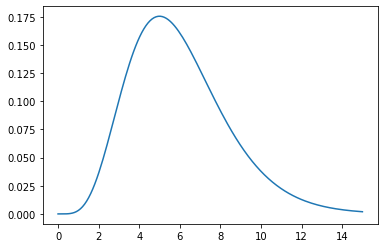

In [39]:
# 2. likelihood
k = 5  # observation: 5 cases
n = 1  # just one obs. data

def likelihood(k, lamb):
    p = np.power(lamb, k) * np.exp(-lamb) / special.factorial(k)
    return p
#

print(f"likelihood(k={k}, lamb=2) = ", likelihood(k, lamb=2.))
lambdavalues = np.linspace(0.001, 15, 150)
likelis = likelihood(k, lambdavalues)
plt.plot(lambdavalues, likelis);

Posterior(lambda) = G(lambda| 7.1, 2)


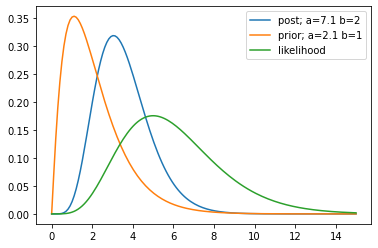

In [40]:
# 3. Posterior = G(lambda| ap = a0 + k, bp = b0 + n)
ap = a0 + k 
bp = b0 + n 

print(f"Posterior(lambda) = G(lambda| {ap}, {bp})")

post = stats.gamma.pdf(lambdavalues, ap, scale = 1/bp)
prior = stats.gamma.pdf(lambdavalues, a0, scale=1/b0)
plt.plot(lambdavalues, post, label=f"post; a={ap} b={bp}");
plt.plot(lambdavalues, prior, label=f"prior; a={a0} b={b0}");
plt.plot(lambdavalues, likelis, label="likelihood");
plt.legend();

Again a set of new data is collected: {1, 2, 0, 3, 4}

What is the updated posterior of $\lambda$?

In [42]:
# new observations
k = 1 + 2 + 0 + 3 + 4
n = 5 

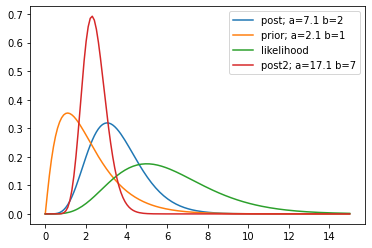

In [44]:
# posterior
ap2 = ap + k 
bp2 = bp + n 

post = stats.gamma.pdf(lambdavalues, ap, scale = 1/bp)
post2 = stats.gamma.pdf(lambdavalues, ap2, scale = 1/bp2)
prior = stats.gamma.pdf(lambdavalues, a0, scale=1/b0)
plt.plot(lambdavalues, post, label=f"post; a={ap} b={bp}");
plt.plot(lambdavalues, prior, label=f"prior; a={a0} b={b0}");
plt.plot(lambdavalues, likelis, label="likelihood");
plt.plot(lambdavalues, post2, label=f"post2; a={ap2} b={bp2}");
plt.legend();

Posterior Predictive Distribution = Gamma-Poission dist.

$$
    Pr[Y=k|D] = \int_{\lambda=0}^{\infty}
                    Pr[Y=k|\lambda] p(\lambda|\hat a, \hat b) d\lambda
$$